In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

import fastf1


session = fastf1.get_session(2023, 'Silverstone', 'Q')
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

circuit_info = session.get_circuit_info()

core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '55', '63', '44', '23', '14', '10', '27', '18', '31', '2', '77', '11', '22', '24', '21', '20']


In [2]:
def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)


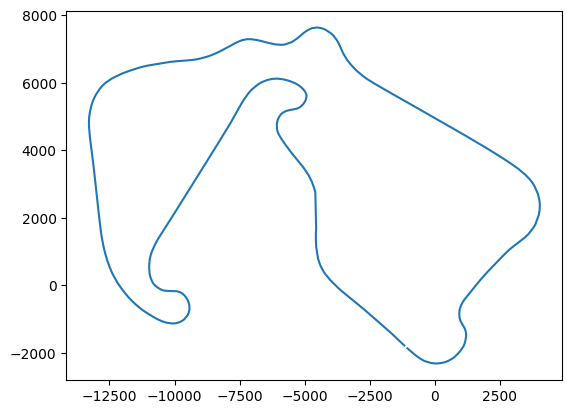

In [3]:
# Get an array of shape [n, 2] where n is the number of points and the second
# axis is x and y.
track = pos.loc[:, ('X', 'Y')].to_numpy()

# Convert the rotation angle from degrees to radian.
track_angle = circuit_info.rotation / 180 * np.pi

# Rotate and plot the track map.
rotated_track = rotate(track, angle=track_angle)
plt.plot(rotated_track[:, 0], rotated_track[:, 1])

In [11]:
track_coordinate = pd.DataFrame(rotated_track, columns=['X','Y'])

In [27]:
# Nombre total de lignes souhaitées
n_lignes_souhaitees = 50
n_lignes_original = len(track_coordinate)

# Calculer le pas nécessaire
pas = n_lignes_original / n_lignes_souhaitees  # Cela peut donner un nombre à virgule

# Générer des indices à partir du pas
indices = np.arange(0, n_lignes_original, pas)

print(indices)

# Convertir les indices en entiers et les arrondir pour éviter les valeurs à virgule
indices = np.round(indices).astype(int)


# Garder uniquement les indices uniques (au cas où il y aurait des doublons après l'arrondi)
indices = np.unique(indices)

# Extraire les lignes correspondantes
df_reduit = track_coordinate.iloc[indices]

# print(df_reduit)
# print(f"Nombre de lignes : {len(df_reduit)}")

[  0.     6.74  13.48  20.22  26.96  33.7   40.44  47.18  53.92  60.66
  67.4   74.14  80.88  87.62  94.36 101.1  107.84 114.58 121.32 128.06
 134.8  141.54 148.28 155.02 161.76 168.5  175.24 181.98 188.72 195.46
 202.2  208.94 215.68 222.42 229.16 235.9  242.64 249.38 256.12 262.86
 269.6  276.34 283.08 289.82 296.56 303.3  310.04 316.78 323.52 330.26]


In [30]:
df_reduit

,X,Y
0,-1171.558665,-1780.971728
7,-2416.612570,-912.894673
13,-3584.453207,-164.195636
20,-4486.474947,794.908519
27,-4723.914650,3067.006093
34,-5814.783215,4247.654549
40,-6063.361930,4804.318381
47,-5683.920248,5170.783946
54,-5057.343467,5365.769940
61,-5040.265046,5793.626607


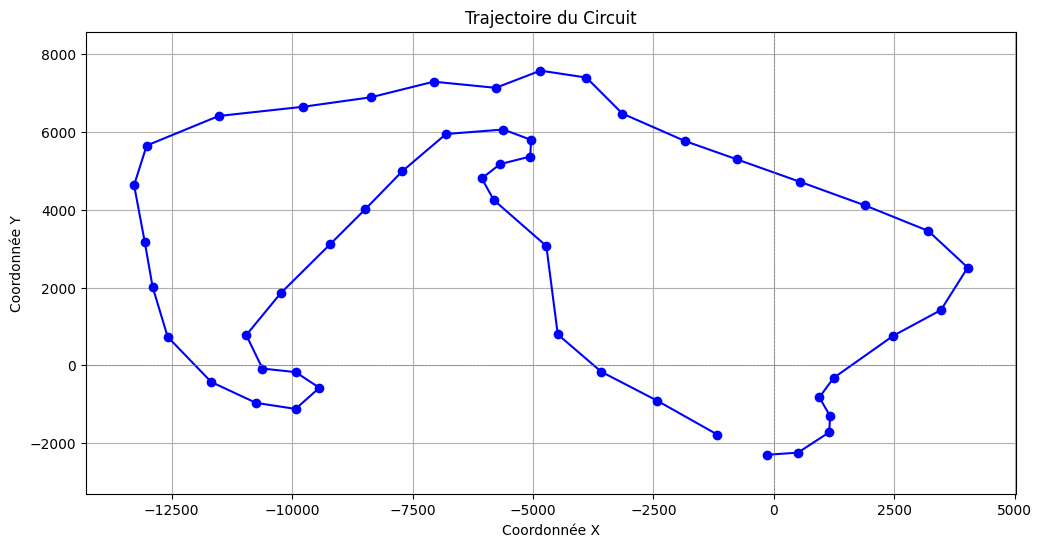

In [88]:
# Tracer les coordonnées
plt.figure(figsize=(12, 6))
plt.plot(df_reduit['X'], df_reduit['Y'], marker='o', linestyle='-', color='b')
plt.title('Trajectoire du Circuit')
plt.xlabel('Coordonnée X')
plt.ylabel('Coordonnée Y')
plt.grid()
plt.axhline(0, color='grey', lw=0.5, ls='--')
plt.axvline(0, color='grey', lw=0.5, ls='--')
plt.xlim(min(df_reduit['X']) - 1000, max(df_reduit['X']) + 1000)  # Ajustez les limites
plt.ylim(min(df_reduit['Y']) - 1000, max(df_reduit['Y']) + 1000)  # Ajustez les limites
plt.show()

In [31]:
df_trun = pd.read_csv('f1_corners_analysis_2023.csv')

In [82]:
corner_x = round(df_trun[df_trun['Grand Prix']=='FORMULA 1 ARAMCO BRITISH GRAND PRIX 2023'].iloc[12]['X'])
corner_y = round(df_trun[df_trun['Grand Prix']=='FORMULA 1 ARAMCO BRITISH GRAND PRIX 2023'].iloc[12]['Y'])

In [83]:
# Calculate distances from the corner
distances = np.sqrt((df_reduit['X'] - corner_x) ** 2 + (df_reduit['Y'] - corner_y) ** 2)

In [84]:
distances.iloc[39]

5884.52008631087

In [85]:
# Get the index of the closest point to the corner
corner_index = np.argmin(distances)

In [86]:
corner_index

41

In [ ]:
df_reduit['angle'] = corner_index

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charger les données
df_trun = pd.read_csv('f1_corners_analysis_2023.csv')

# Créer un DataFrame pour les virages
df_corners = df_trun[df_trun['Grand Prix'] == 'FORMULA 1 ARAMCO BRITISH GRAND PRIX 2023']

# Initialiser une liste pour stocker les résultats
closest_sections = []

# Trouver la section la plus proche pour chaque virage
for index, row in df_corners.iterrows():
    corner_x = row['X']
    corner_y = row['Y']
    
    # Calculer les distances entre le virage et chaque section
    distances = np.sqrt((df_reduit['X'] - corner_x) ** 2 + (df_reduit['Y'] - corner_y) ** 2)
    
    # Trouver l'index de la section la plus proche
    closest_index = np.argmin(distances)
    
    # Ajouter le résultat à la liste
    closest_sections.append((row['Number'], closest_index, list(distances)[closest_index]))


In [110]:
closest_sections

[(1, 38, 695.5127874574139),
 (2, 39, 946.9832903258525),
 (3, 40, 2941.572778727568),
 (4, 41, 2845.927848712959),
 (5, 40, 4266.795907042134),
 (6, 36, 5711.4609914531675),
 (7, 34, 3959.0989171432216),
 (8, 34, 6807.15744079535),
 (9, 39, 9701.648894235603),
 (10, 40, 5955.442201715258),
 (11, 40, 5539.438223138642),
 (12, 41, 4444.610830039173),
 (13, 41, 4100.603536855945),
 (14, 41, 2855.283780740441),
 (15, 48, 2657.222886045842),
 (16, 0, 960.9561953394318),
 (17, 0, 687.9240519807857),
 (18, 1, 814.2727649033)]

TypeError: Cannot index by location index with a non-integer key

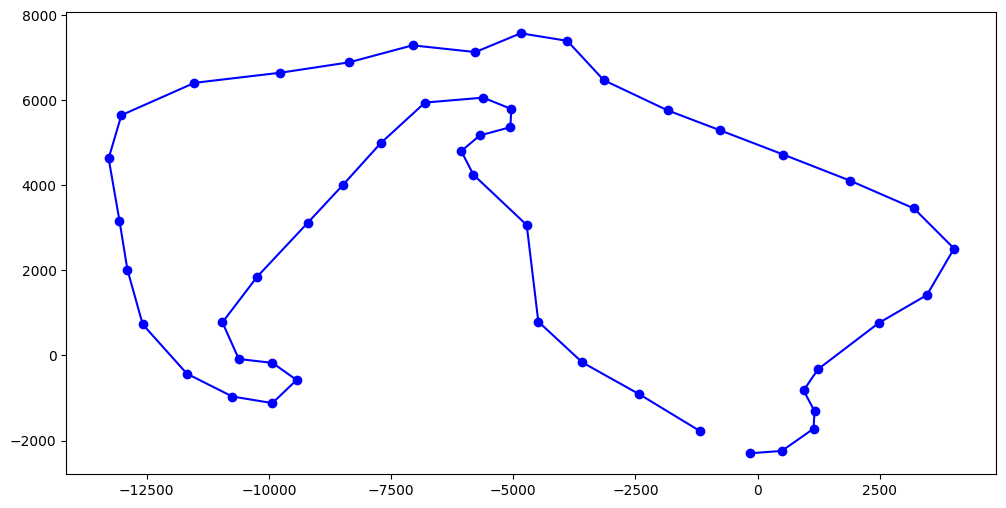

In [109]:

# Créer un DataFrame pour les sections les plus proches
df_closest = pd.DataFrame(closest_sections, columns=['Virage', 'SectionIndex', 'Distance'])

# Tracer les sections du circuit
plt.figure(figsize=(12, 6))
plt.plot(df_reduit['X'], df_reduit['Y'], marker='o', linestyle='-', color='b', label='Trajectoire du Circuit')

# Annoter les sections avec les virages correspondants
for index, row in df_closest.iterrows():
    section_index = row['SectionIndex']
    corner_number = row['Virage']
    
    # Récupérer les coordonnées de la section la plus proche
    section_x = df_reduit.iloc[section_index]['X']
    section_y = df_reduit.iloc[section_index]['Y']
    
    # Tracer la section associée
    plt.plot(section_x, section_y, marker='o', color='red')
    
    # Annoter avec le numéro de virage
    plt.annotate(f"Virage {corner_number}", 
                 (section_x, section_y), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=8, color='red')

# Détails du graphique
plt.title('Trajectoire du Circuit avec Virages Associés aux Sections')
plt.xlabel('Coordonnée X')
plt.ylabel('Coordonnée Y')
plt.grid()
plt.axhline(0, color='grey', lw=0.5, ls='--')
plt.axvline(0, color='grey', lw=0.5, ls='--')
plt.xlim(min(df_reduit['X']) - 1000, max(df_reduit['X']) + 1000)  # Ajustez les limites
plt.ylim(min(df_reduit['Y']) - 1000, max(df_reduit['Y']) + 1000)  # Ajustez les limites
plt.legend()
plt.show()
